In [1]:
import pandas as pd
import re

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_1 = pd.read_csv('data/2025.csv')
df_2 = pd.read_csv('data/2024_2021.csv')
df_3 = pd.read_csv('data/2020_2017.csv')


In [4]:
# df_1.head()  # Display the first few rows of df_1

In [5]:
# df_2.head()  # Display the first few rows of df_2

In [6]:
df_projects_1 = df_1[["NOMBREPROYEC", "FACULTAD", "CARRERA"]].groupby(["NOMBREPROYEC", "FACULTAD", "CARRERA"]).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
df_projects_2 = df_2[["NOMBREPROYEC", "FACULTAD", "CARRERA"]].groupby(["NOMBREPROYEC", "FACULTAD", "CARRERA"]).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
df_projects_3 = df_3[["NOMBREPROYEC", "FACULTAD", "CARRERA"]].groupby(["NOMBREPROYEC", "FACULTAD", "CARRERA"]).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [7]:
df_projects = pd.concat([df_projects_1, df_projects_2]).groupby(["NOMBREPROYEC", "FACULTAD", "CARRERA"]).sum().reset_index().sort_values(by='counts', ascending=False)
df_projects = pd.concat([df_projects, df_projects_3]).groupby(["NOMBREPROYEC", "FACULTAD", "CARRERA"]).sum().reset_index().sort_values(by='counts', ascending=False)

In [8]:
df_projects.reset_index(drop=True, inplace=True)

In [9]:
df_projects.shape

(6863, 4)

In [10]:
df_projects.head()

,NOMBREPROYEC,FACULTAD,CARRERA,counts
0,PLAN DE NEGOCIOS PARA LA VENTA DE SNACKS SALUD...,Facultad de Ciencias Sociales y Humanísticas,Ingeniería en Negocios Internacionales,56
1,Variacion del tiempo de fraguado debido a mixt...,Facultad de Ingeniería en Ciencias de la Tierra,Ingeniería Civil,56
2,Tecnologías aplicadas y análisis económico en ...,Facultad de Ciencias Sociales y Humanísticas,Economía,54
3,Estudio de factibilidad para la comercializaci...,Facultad de Ciencias Sociales y Humanísticas,Economía,52
4,MONITOREO NO INTRUSIVO DE CARGAS ELÉCTRICAS EN...,Facultad de Ciencias Naturales y Matemáticas,Logistica y Transporte,49


In [11]:
df_projects.tail()

,NOMBREPROYEC,FACULTAD,CARRERA,counts
6858,Diseño de una línea de proceso para la producc...,Facultad de Ingeniería en Mecánica y Ciencias ...,Ingeniería en Alimentos,1
6859,Producción de material audiovisual como insu...,Escuela de Diseño y Comunicación Visual,Licenciatura en Diseño y Producción Audiovisual,1
6860,Valoración del potencial económico de las técn...,Facultad de Ciencias Sociales y Humanísticas,Economía Con Mención en Gestión Empresarial Es...,1
6861,Realización de un documental audiovisual sobr...,Escuela de Diseño y Comunicación Visual,Licenciatura en Diseño y Producción Audiovisual,1
6862,Diseño de un sistema de comunicación de la avi...,Escuela de Diseño y Comunicación Visual,Licenciatura en Diseño Gráfico y Publicitario,1


In [12]:
df_projects["NOMBREPROYEC"].iloc[0:3]

0    PLAN DE NEGOCIOS PARA LA VENTA DE SNACKS SALUD...
1    Variacion del tiempo de fraguado debido a mixt...
2    Tecnologías aplicadas y análisis económico en ...
Name: NOMBREPROYEC, dtype: object

In [13]:
# df_3[df_3["NOMBREPROYEC"] == df_projects["NOMBREPROYEC"].iloc[1]]#["ESTUDIANTE"].unique()
# # muchos estudiantes en un proyecto

FACULTAD
Facultad de Ingeniería en Electricidad y Computación                                    1369
Facultad de Ciencias Sociales y Humanísticas                                            1364
Facultad de Ingeniería en Mecánica y Ciencias de la Producción                          1264
Facultad de Ingeniería en Ciencias de la Tierra                                          710
Facultad de Ciencias Naturales y Matemáticas                                             651
Facultad de Arte, Diseño y Comunicación Audiovisual                                      613
Facultad de Ciencias de la Vida                                                          442
Facultad de Ingeniería Marítima y Ciencias del Mar                                       238
Escuela de Diseño y Comunicación Visual                                                  147
Facultad de Ingeniería Marítima, Ciencias Biológicas, Oceánicas y Recursos Naturales      65
Name: count, dtype: int64


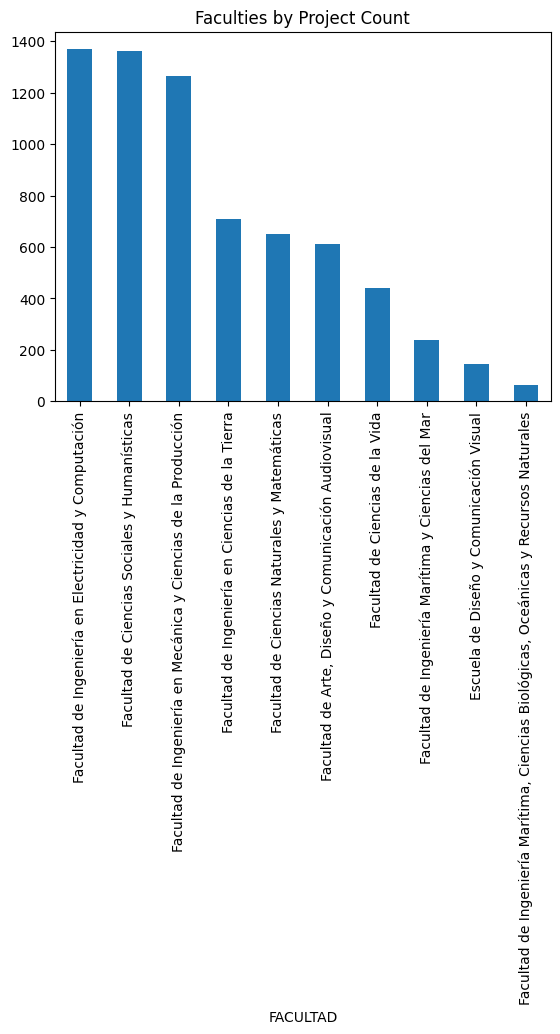

In [23]:
df_projects["FACULTAD"].value_counts().plot(kind='bar', title='Faculties by Project Count')
print(df_projects["FACULTAD"].value_counts())

<Axes: title={'center': 'Project Counts by Faculty and Career'}>

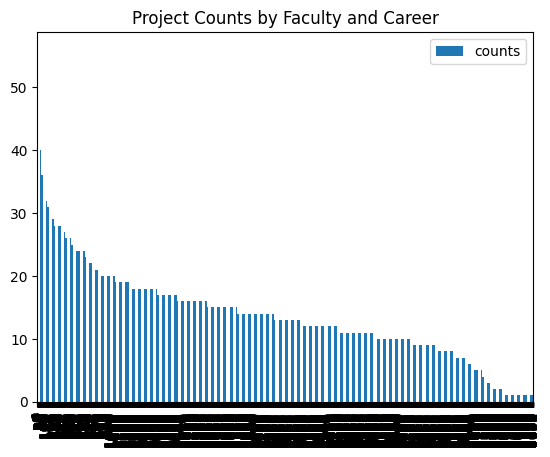

In [15]:
df_projects.plot(kind='bar', title='Project Counts by Faculty and Career')

In [16]:
def apply_function_name(row):
    if pd.isna(row):
        return "No Name"
    
    # eliminar signos de puntuación y caracteres especiales
    row = re.sub(r'[^\w\s]', '', row)
    # eliminar números
    row = re.sub(r'\d+', '', row)
    # eliminar espacios extra
    row = re.sub(r'\s+', ' ', row).strip()
    # convertir a minúsculas
    row = row.lower()
    # reemplazar multiples espacios por espacio simple
    row = re.sub(r'\s+', ' ', row)

    return row

In [17]:
df_projects["titulo"] = df_projects["NOMBREPROYEC"].apply(apply_function_name)

In [19]:
df_projects

,NOMBREPROYEC,FACULTAD,CARRERA,counts,titulo
0,PLAN DE NEGOCIOS PARA LA VENTA DE SNACKS SALUD...,Facultad de Ciencias Sociales y Humanísticas,Ingeniería en Negocios Internacionales,56,plan de negocios para la venta de snacks salud...
1,Variacion del tiempo de fraguado debido a mixt...,Facultad de Ingeniería en Ciencias de la Tierra,Ingeniería Civil,56,variacion del tiempo de fraguado debido a mixt...
2,Tecnologías aplicadas y análisis económico en ...,Facultad de Ciencias Sociales y Humanísticas,Economía,54,tecnologías aplicadas y análisis económico en ...
3,Estudio de factibilidad para la comercializaci...,Facultad de Ciencias Sociales y Humanísticas,Economía,52,estudio de factibilidad para la comercializaci...
4,MONITOREO NO INTRUSIVO DE CARGAS ELÉCTRICAS EN...,Facultad de Ciencias Naturales y Matemáticas,Logistica y Transporte,49,monitoreo no intrusivo de cargas eléctricas en...
...,...,...,...,...,...
6858,Diseño de una línea de proceso para la producc...,Facultad de Ingeniería en Mecánica y Ciencias ...,Ingeniería en Alimentos,1,diseño de una línea de proceso para la producc...
6859,Producción de material audiovisual como insu...,Escuela de Diseño y Comunicación Visual,Licenciatura en Diseño y Producción Audiovisual,1,producción de material audiovisual como insumo...
6860,Valoración del potencial económico de las técn...,Facultad de Ciencias Sociales y Humanísticas,Economía Con Mención en Gestión Empresarial Es...,1,valoración del potencial económico de las técn...
6861,Realización de un documental audiovisual sobr...,Escuela de Diseño y Comunicación Visual,Licenciatura en Diseño y Producción Audiovisual,1,realización de un documental audiovisual sobre...


CARRERA
Mecánica                                                                      454
Ingeniería  Civil                                                             442
Economía                                                                      372
Computación                                                                   366
Ingeniería Industrial                                                         325
Administración de Empresas                                                    302
Diseño Gráfico                                                                296
Producción para Medios de Comunicación                                        283
Ingeniería Química                                                            254
Electrónica y Automatización                                                  251
Turismo                                                                       241
Telecomunicaciones                                                            234
Electric

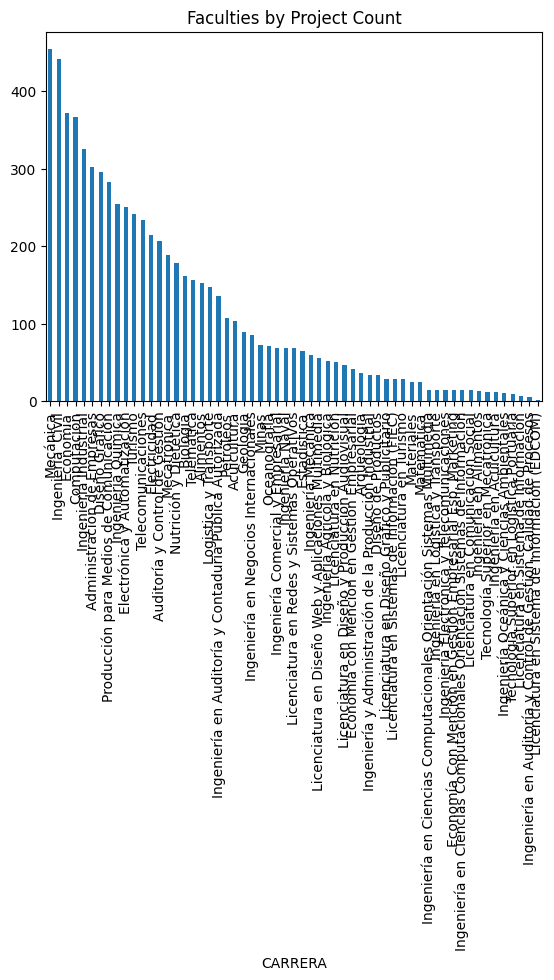

In [22]:
df_projects["CARRERA"].value_counts().plot(kind='bar', title='Faculties by Project Count')
print(df_projects["CARRERA"].value_counts())